In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('large_art_ecommerce_dataset.csv')

I am going to explore and understand the dataset with EDA princples on the below.

In [3]:
df.head(5)

,Name of Painter,Subject of Painting,Style,Medium,Size,Frame,Location,Price ($),Delivery (days),Shipment,Color Palette,Copy or Original,Print or Real,Recommended Environment,Mood/Atmosphere,Theme/Lighting Requirements,Reproduction Type,Target Audience
0,Noah,Seascape,Abstract Expressionism,Watercolor,"20""x30""",Yes,Chicago,459,6,Free Shipping,Neutral Tones,Original,Print,Bedroom,Calming,Natural Light,Screen Print,Corporate Clients
1,Vincent,Abstract,Abstract Expressionism,Charcoal,"20""x30""",No,Miami,657,6,Free Shipping,Cool Tones,Original,Print,Living Room,Relaxing,Natural Light,NaN,Corporate Clients
2,Ava,Still Life,Modern,Watercolor,"18""x24""",No,Miami,907,7,Standard,Cool Tones,Original,Real,Kid Room,Joyful,Natural Light,NaN,Corporate Clients
3,Liam,Wildlife,Cubism,Acrylic,"18""x24""",No,Calgary,649,3,Standard,Oceanic Tones,Original,Real,Office,Reflective,Bright Light,Lithograph,Young Professionals
4,Olivia,Landscape,Abstract Expressionism,Charcoal,"30""x40""",Yes,Miami,539,5,Free Shipping,Earthy Tones,Copy,Print,Office,Energetic,Bright Light,Lithograph,Corporate Clients


In [4]:
df.shape

(2500, 18)

In [5]:
df.describe()

,Price ($),Delivery (days)
count,2500.000000,2500.000000
mean,576.781200,6.482400
std,257.831587,2.282581
min,127.000000,3.000000
25%,344.000000,4.000000
50%,640.000000,7.000000
75%,813.000000,8.000000
max,975.000000,10.000000


In [6]:
df.describe(include=object)

,Name of Painter,Subject of Painting,Style,Medium,Size,Frame,Location,Shipment,Color Palette,Copy or Original,Print or Real,Recommended Environment,Mood/Atmosphere,Theme/Lighting Requirements,Reproduction Type,Target Audience
count,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,2500,1823,2500
unique,11,7,6,5,5,2,8,3,5,2,2,5,5,3,4,5
top,Olivia,Wildlife,Surrealism,Watercolor,"16""x20""",No,Montreal,Free Shipping,Earthy Tones,Original,Print,Office,Relaxing,Dim Light,Lithograph,Interior Designers
freq,251,370,434,672,514,1285,535,834,528,1279,1282,515,512,840,623,527


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name of Painter              2500 non-null   object
 1   Subject of Painting          2500 non-null   object
 2   Style                        2500 non-null   object
 3   Medium                       2500 non-null   object
 4   Size                         2500 non-null   object
 5   Frame                        2500 non-null   object
 6   Location                     2500 non-null   object
 7   Price ($)                    2500 non-null   int64 
 8   Delivery (days)              2500 non-null   int64 
 9   Shipment                     2500 non-null   object
 10  Color Palette                2500 non-null   object
 11  Copy or Original             2500 non-null   object
 12  Print or Real                2500 non-null   object
 13  Recommended Environment      2500

In [8]:
df.isnull().sum()

Name of Painter                  0
Subject of Painting              0
Style                            0
Medium                           0
Size                             0
Frame                            0
Location                         0
Price ($)                        0
Delivery (days)                  0
Shipment                         0
Color Palette                    0
Copy or Original                 0
Print or Real                    0
Recommended Environment          0
Mood/Atmosphere                  0
Theme/Lighting Requirements      0
Reproduction Type              677
Target Audience                  0
dtype: int64

**CLEANING**

In [9]:
df['Reproduction Type'] = df['Reproduction Type'].fillna('Not Applicable')

In [10]:
df = df.drop_duplicates()

I found 677 missing values in Reproduction Type, which represent artworks where the reproduction type doesn't apply. Instead of removing all the missing values, I filled them with 'Not Applicable'. The reason for that is because there are many rows that would be removed, and the 677 missing values can have some importance in the dataset.

In [11]:
columns_to_drop = ['Delivery (days)']
df = df.drop(columns_to_drop, axis=1)

I removed 'Delivery (days)' columm as it doesn't contribute to predicting price category. So, it was an unnecessary column that I just removed.

In [12]:
df.shape

(2500, 17)

In [13]:
df.isnull().sum()

Name of Painter                0
Subject of Painting            0
Style                          0
Medium                         0
Size                           0
Frame                          0
Location                       0
Price ($)                      0
Shipment                       0
Color Palette                  0
Copy or Original               0
Print or Real                  0
Recommended Environment        0
Mood/Atmosphere                0
Theme/Lighting Requirements    0
Reproduction Type              0
Target Audience                0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df['Price_Category'] = pd.qcut(df['Price ($)'], 
                                q=3, 
                                labels=['Low', 'Medium', 'High'])

df['Price_Category'].value_counts()

Price_Category
Low       850
High      833
Medium    817
Name: count, dtype: int64

I defined 'Price ($)' as 'Price_Category' and divided it into three equal quantitles using pd.qcut() as Low, Medium, and High because I want to create balanced classes for classification.

In [16]:
df['Price_Category'].value_counts()
df['Price_Category'].value_counts(normalize=True) * 100

Price_Category
Low       34.00
High      33.32
Medium    32.68
Name: proportion, dtype: float64

In [17]:
X = df[['Name of Painter', 'Style', 'Medium', 'Size', 'Frame', 'Location', 
        'Shipment', 'Color Palette', 'Copy or Original', 'Print or Real', 
        'Recommended Environment', 'Mood/Atmosphere', 'Theme/Lighting Requirements', 
        'Reproduction Type', 'Target Audience']]
y = df['Price_Category']

I defined X and y. I will use 15 features for X and I will only use 'Price_Category' as y for what I want to predict.

In [18]:
df = pd.concat([X,y], axis=1)

df.head()

,Name of Painter,Style,Medium,Size,Frame,Location,Shipment,Color Palette,Copy or Original,Print or Real,Recommended Environment,Mood/Atmosphere,Theme/Lighting Requirements,Reproduction Type,Target Audience,Price_Category
0,Noah,Abstract Expressionism,Watercolor,"20""x30""",Yes,Chicago,Free Shipping,Neutral Tones,Original,Print,Bedroom,Calming,Natural Light,Screen Print,Corporate Clients,Medium
1,Vincent,Abstract Expressionism,Charcoal,"20""x30""",No,Miami,Free Shipping,Cool Tones,Original,Print,Living Room,Relaxing,Natural Light,Not Applicable,Corporate Clients,Medium
2,Ava,Modern,Watercolor,"18""x24""",No,Miami,Standard,Cool Tones,Original,Real,Kid Room,Joyful,Natural Light,Not Applicable,Corporate Clients,High
3,Liam,Cubism,Acrylic,"18""x24""",No,Calgary,Standard,Oceanic Tones,Original,Real,Office,Reflective,Bright Light,Lithograph,Young Professionals,Medium
4,Olivia,Abstract Expressionism,Charcoal,"30""x40""",Yes,Miami,Free Shipping,Earthy Tones,Copy,Print,Office,Energetic,Bright Light,Lithograph,Corporate Clients,Medium


In [19]:
df.shape

(2500, 16)

In [20]:
df.isnull().sum()

Name of Painter                0
Style                          0
Medium                         0
Size                           0
Frame                          0
Location                       0
Shipment                       0
Color Palette                  0
Copy or Original               0
Print or Real                  0
Recommended Environment        0
Mood/Atmosphere                0
Theme/Lighting Requirements    0
Reproduction Type              0
Target Audience                0
Price_Category                 0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Name of Painter              2500 non-null   object  
 1   Style                        2500 non-null   object  
 2   Medium                       2500 non-null   object  
 3   Size                         2500 non-null   object  
 4   Frame                        2500 non-null   object  
 5   Location                     2500 non-null   object  
 6   Shipment                     2500 non-null   object  
 7   Color Palette                2500 non-null   object  
 8   Copy or Original             2500 non-null   object  
 9   Print or Real                2500 non-null   object  
 10  Recommended Environment      2500 non-null   object  
 11  Mood/Atmosphere              2500 non-null   object  
 12  Theme/Lighting Requirements  2500 non-null   object  
 13  Rep

The data is now cleaned with 2,500 rows (or observations) and 16 columns, as required for this assessment. I don’t have any missing values anymore because I filled them with 'Not Applicable' and removed the Delivery (days) column. I also renamed Price ($) to Price_Category as it is my target variable.

In [22]:
#Encoding

from sklearn.preprocessing import LabelEncoder

In [23]:
X_encoded = X.copy()

In [24]:
for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

In [25]:
X_encoded.shape

(2500, 15)

In [26]:
X_encoded.dtypes

Name of Painter                int64
Style                          int64
Medium                         int64
Size                           int64
Frame                          int64
Location                       int64
Shipment                       int64
Color Palette                  int64
Copy or Original               int64
Print or Real                  int64
Recommended Environment        int64
Mood/Atmosphere                int64
Theme/Lighting Requirements    int64
Reproduction Type              int64
Target Audience                int64
dtype: object

In [27]:
X_encoded.head()

,Name of Painter,Style,Medium,Size,Frame,Location,Shipment,Color Palette,Copy or Original,Print or Real,Recommended Environment,Mood/Atmosphere,Theme/Lighting Requirements,Reproduction Type,Target Audience
0,7,0,4,2,1,1,1,2,1,0,0,0,2,4,1
1,10,0,1,2,0,3,1,0,1,0,3,4,2,3,1
2,0,3,4,1,0,3,2,0,1,1,2,2,2,3,1
3,6,1,0,1,0,0,2,3,1,1,4,3,0,2,4
4,8,0,1,4,1,3,1,1,0,0,4,1,0,2,1


I used LabelEnconder to convert categorical features to numerical values. As machine learning algotithms require numerical imput, I need to encode text categories.

**TRAIN TEST SPLIT**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
#10%
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_encoded, y, test_size = 0.10, random_state = 42)

X_train_10.shape
X_test_10.shape 

(250, 15)

In [30]:
#15%
X_train_15, X_test_15, y_train_15, y_test_15 = train_test_split(X_encoded, y, test_size = 0.15, random_state = 42)

X_train_15.shape
X_test_15.shape 

(375, 15)

In [31]:
#20%
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X_encoded, y, test_size = 0.20, random_state = 42)

X_train_20.shape
X_test_20.shape 

(500, 15)

I created training and testing datasets, splitting data into subsets for training and evaluating models . 

Train test split 10% - 90% training, 10% testing/
Train test split 15% - 85% training, 15% testing/
Train test split 20% - 80% training, 20% testing.

**Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  
from sklearn.model_selection import cross_val_score

clf_RF = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [33]:
#10%
clf_RF.fit(X_train_10, y_train_10)
y_pred_10 = clf_RF.predict(X_test_10)

accuracy_10 = metrics.accuracy_score(y_test_10, y_pred_10)
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test_10, y_pred_10)))

cv_scores_10 = cross_val_score(clf_RF, X_train_10, y_train_10, cv=5, scoring= 'accuracy')
cv_mean_10 = cv_scores_10.mean()
cv_std_10 = cv_scores_10.std()
print(f"Individual fold scores: {[round(score, 4) for score in cv_scores_10]}")
print(f"Mean CV Score: {cv_mean_10:.4f}")
print(f"Standard Deviation: {cv_std_10:.4f}")


Accuracy: 0.41
Individual fold scores: [np.float64(0.3444), np.float64(0.3311), np.float64(0.3222), np.float64(0.3067), np.float64(0.3222)]
Mean CV Score: 0.3253
Standard Deviation: 0.0124


In [34]:
#15%
clf_RF.fit(X_train_15, y_train_15)
y_pred_15 = clf_RF.predict(X_test_15)

accuracy_15 = metrics.accuracy_score(y_test_15, y_pred_15)
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test_15, y_pred_15)))

cv_scores_15 = cross_val_score(clf_RF, X_train_15, y_train_15, cv=5, scoring= 'accuracy')
cv_mean_15 = cv_scores_15.mean()
cv_std_15 = cv_scores_15.std()
print(f"Individual fold scores: {[round(score, 4) for score in cv_scores_15]}")
print(f"Mean CV Score: {cv_mean_15:.4f}")
print(f"Standard Deviation: {cv_std_15:.4f}")


Accuracy: 0.38
Individual fold scores: [np.float64(0.3082), np.float64(0.3459), np.float64(0.2988), np.float64(0.32), np.float64(0.3247)]
Mean CV Score: 0.3195
Standard Deviation: 0.0160


In [35]:
#20%
clf_RF.fit(X_train_20, y_train_20)
y_pred_20 = clf_RF.predict(X_test_20)

accuracy_20 = metrics.accuracy_score(y_test_20, y_pred_20)
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test_20, y_pred_20)))

cv_scores_20 = cross_val_score(clf_RF, X_train_20, y_train_20, cv=5, scoring= 'accuracy')
cv_mean_20 = cv_scores_20.mean()
cv_std_20 = cv_scores_20.std()
print(f"Individual fold scores: {[round(score, 4) for score in cv_scores_20]}")
print(f"Mean CV Score: {cv_mean_20:.4f}")
print(f"Standard Deviation: {cv_std_20:.4f}")


Accuracy: 0.35
Individual fold scores: [np.float64(0.2775), np.float64(0.3475), np.float64(0.31), np.float64(0.31), np.float64(0.3175)]
Mean CV Score: 0.3125
Standard Deviation: 0.0223


I train and evaluate, calculate the accuracy and also performed 5 fold cross-validation for Random Forest for each split category, building multiple decision trees and combine their predictions.

**SVM**

In [36]:
from sklearn.svm import SVC

In [37]:
svm_model = SVC(kernel='rbf', random_state=42)

In [38]:
#10%
svm_model.fit(X_train_10, y_train_10)

y_pred_svm_10 = svm_model.predict(X_test_10)

accuracy_svm_10 = metrics.accuracy_score(y_test_10, y_pred_svm_10)
print(f"Test Accuracy: {accuracy_svm_10:.4f} ({accuracy_svm_10*100:.2f}%)")

cv_scores_svm_10 = cross_val_score(svm_model, X_train_10, y_train_10, cv=5, scoring='accuracy')
cv_mean_svm_10 = cv_scores_svm_10.mean()
cv_std_svm_10 = cv_scores_svm_10.std()
print(f"Individual fold scores: {[round(score, 4) for score in cv_scores_svm_10]}")
print(f"Mean CV Score: {cv_mean_svm_10:.4f}")
print(f"Standard Deviation: {cv_std_svm_10:.4f}")

Test Accuracy: 0.3520 (35.20%)
Individual fold scores: [np.float64(0.3067), np.float64(0.2889), np.float64(0.3444), np.float64(0.2778), np.float64(0.3044)]
Mean CV Score: 0.3044
Standard Deviation: 0.0226


In [39]:
#15%
svm_model.fit(X_train_15, y_train_15)

y_pred_svm_15 = svm_model.predict(X_test_15)

accuracy_svm_15 = metrics.accuracy_score(y_test_15, y_pred_svm_15)
print(f"Test Accuracy: {accuracy_svm_15:.4f} ({accuracy_svm_15*100:.2f}%)")

cv_scores_svm_15 = cross_val_score(svm_model, X_train_15, y_train_15, cv=5, scoring='accuracy')
cv_mean_svm_15 = cv_scores_svm_15.mean()
cv_std_svm_15 = cv_scores_svm_15.std()
print(f"Individual fold scores: {[round(score, 4) for score in cv_scores_svm_15]}")
print(f"Mean CV Score: {cv_mean_svm_15:.4f}")
print(f"Standard Deviation: {cv_std_svm_15:.4f}")

Test Accuracy: 0.3280 (32.80%)
Individual fold scores: [np.float64(0.3153), np.float64(0.2871), np.float64(0.3647), np.float64(0.3271), np.float64(0.2682)]
Mean CV Score: 0.3125
Standard Deviation: 0.0333


In [40]:
#20%
svm_model.fit(X_train_20, y_train_20)

y_pred_svm_20 = svm_model.predict(X_test_20)

accuracy_svm_20 = metrics.accuracy_score(y_test_20, y_pred_svm_20)
print(f"Test Accuracy: {accuracy_svm_20:.4f} ({accuracy_svm_20*100:.2f}%)")

cv_scores_svm_20 = cross_val_score(svm_model, X_train_20, y_train_20, cv=5, scoring='accuracy')
cv_mean_svm_20 = cv_scores_svm_20.mean()
cv_std_svm_20 = cv_scores_svm_20.std()
print(f"Individual fold scores: {[round(score, 4) for score in cv_scores_svm_20]}")
print(f"Mean CV Score: {cv_mean_svm_20:.4f}")
print(f"Standard Deviation: {cv_std_svm_20:.4f}")

Test Accuracy: 0.3500 (35.00%)
Individual fold scores: [np.float64(0.3075), np.float64(0.31), np.float64(0.345), np.float64(0.3125), np.float64(0.265)]
Mean CV Score: 0.3080
Standard Deviation: 0.0255


I train and evaluate, calculate the accuracy and also performed 5 fold cross-validation on training set for SVM for each split category. It maps data to a higher dimensional space where linear separation is possible.

In [41]:
results_splits = pd.DataFrame({
    'Split': ['10%', '15%', '20%'],
    'RF Accuracy': [accuracy_10, accuracy_15, accuracy_20],
    'RF CV Mean': [cv_mean_10, cv_mean_15, cv_mean_20],
    'RF CV Std': [cv_std_10, cv_std_15, cv_std_20],
    'SVM Accuracy': [accuracy_svm_10, accuracy_svm_15, accuracy_svm_20],
    'SVM CV Mean': [cv_mean_svm_10, cv_mean_svm_15, cv_mean_svm_20],
    'SVM CV Std': [cv_std_svm_10, cv_std_svm_15, cv_std_svm_20]
})

print(results_splits.to_string(index=False))

Split  RF Accuracy  RF CV Mean  RF CV Std  SVM Accuracy  SVM CV Mean  SVM CV Std
  10%     0.408000    0.325333   0.012381         0.352     0.304444    0.022619
  15%     0.378667    0.319529   0.015986         0.328     0.312471    0.033322
  20%     0.352000    0.312500   0.022305         0.350     0.308000    0.025466


**Hyperparameters**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [43]:
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    }
}
print("Random Forest parameters:")
for param, values in param_grids['Random Forest'].items():
    print(f"  {param}: {values}")

print("SVM parameters:")
for param, values in param_grids['SVM'].items():
    print(f"  {param}: {values}")
    

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

results = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}
conf_matrices = []
model_names = []


for name, model in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=3, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_20, y_train_20)
    
    best_model = grid_search.best_estimator_ 
    y_pred = best_model.predict(X_test_20)

    acc = accuracy_score(y_test_20, y_pred)
    prec = precision_score(y_test_20, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test_20, y_pred, average='weighted')
    f1 = f1_score(y_test_20, y_pred, average='weighted')

    results["Accuracy"].append(acc)
    results["Precision"].append(prec)
    results["Recall"].append(rec)
    results["F1 Score"].append(f1)

    conf_matrices.append(confusion_matrix(y_test_20, y_pred))
    model_names.append(name)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Random Forest parameters:
  n_estimators: [100, 200, 300]
  max_depth: [10, 20, None]
  min_samples_split: [2, 5, 10]
SVM parameters:
  C: [0.1, 1, 10]
  kernel: ['rbf', 'linear']
  gamma: ['scale', 'auto']
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Accuracy: 0.3200
Precision: 0.1024
Recall: 0.3200
F1 Score: 0.1552


I defined hyperparameter grids for both models.

In [44]:
comparison_df = pd.DataFrame({
    'Accuracy': results['Accuracy'],
    'Precision': results['Precision'],
    'Recall': results['Recall'],
    'F1 Score': results['F1 Score']
})
    
print(comparison_df.to_string(index=False))

 Accuracy  Precision  Recall  F1 Score
    0.356   0.358672   0.356  0.355791
    0.320   0.102400   0.320  0.155152


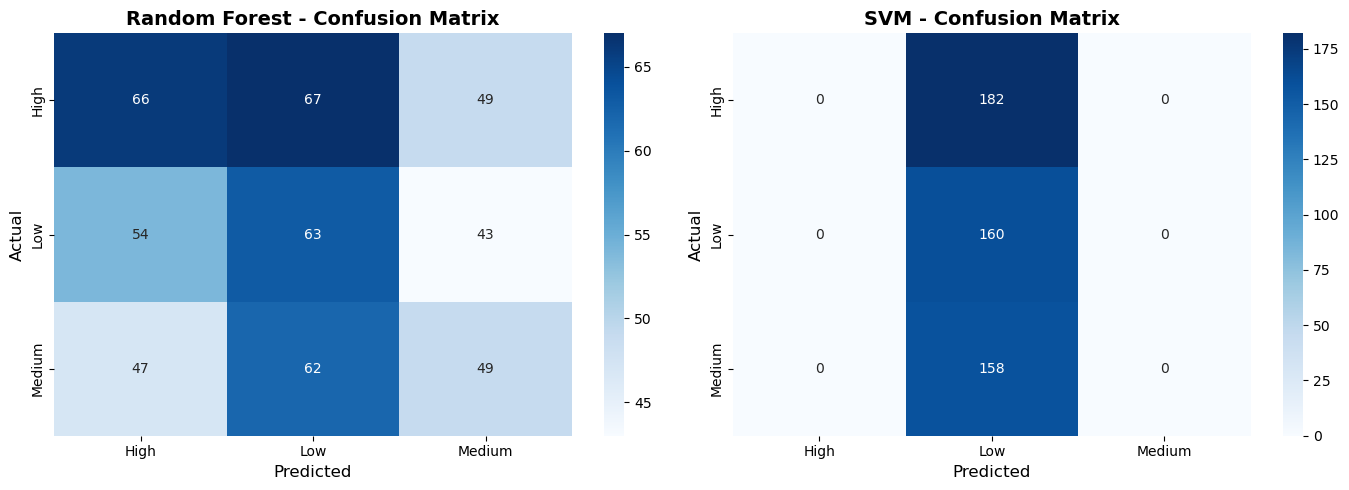

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, ax in enumerate(axes.flatten()):
    if i < len(conf_matrices):
        sns.heatmap(conf_matrices[i], annot=True, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f'{model_names[i]} - Confusion Matrix', fontsize=14, fontweight='bold')
        ax.set_xlabel('Predicted', fontsize=12)
        ax.set_ylabel('Actual', fontsize=12)
        ax.set_xticklabels(['High', 'Low', 'Medium'])
        ax.set_yticklabels(['High', 'Low', 'Medium'])

plt.tight_layout()
plt.show()

The confusion matrix shows how many predictions were correct for each category.

Random Forest: The confusion matrix revealed 39.4% of the price of the artwork is low, 36,3% is high and 31% is medium. The confusion Matrix shows that 67 high artwork were classified as low.

SVM: All 500 predictions are classifies as low. It seems a critical failure in model behavior, producing zero predictions for medium and high categories.

In [46]:
comparison_df = pd.DataFrame(results)
print(comparison_df)

   Accuracy  Precision  Recall  F1 Score
0     0.356   0.358672   0.356  0.355791
1     0.320   0.102400   0.320  0.155152
